# **Google PlayStore EDA**
***Author:*** Khizer Rehman
### In this EDA , I am using the dataset of Google PlayStore apps which downloaded from the following [Link](https://www.kaggle.com/datasets/lava18/google-play-store-apps)

# `About Dataset`
* `Context`

   While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

* `Content`

   Each app (row) has values for catergory, rating, size, and more.

* `Acknowledgements`

   This information is scraped from the Google Play Store. This app information would not be available without it.

* `Inspiration`

   The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!


# 1.  First of all Importing all the important Libraries

In [204]:
# This is use for the jupyter notebook to show the graphs in the notebook itself instead to open in new window
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# 2. Now, Load the Dataset

In [205]:
df = pd.read_csv('Datasets/googleplaystore.csv')
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN


In [206]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Unnamed: 13'],
      dtype='object')

# 3. Basic Info about the whole Dataset

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
 13  Unnamed: 13     0 non-null      float64
dtypes: float64(2), int64(1), object(11)
memory usage: 1.2+ MB


# 4. Creating Statistic analysis of the whole dataset

In [208]:
df.describe()

,Rating,Reviews,Unnamed: 13
count,9367.000000,1.084100e+04,0.0
mean,4.191513,4.441119e+05,NaN
std,0.515735,2.927629e+06,NaN
min,1.000000,0.000000e+00,NaN
25%,4.000000,3.800000e+01,NaN
50%,4.300000,2.094000e+03,NaN
75%,4.500000,5.476800e+04,NaN
max,5.000000,7.815831e+07,NaN


In [209]:
len(df)

10841

In [ ]:
# for col in df.columns:
#     print(col)

x = 0
while x < len(df.columns):
    print(df.columns[x])   
    x +=1

App
Category
Rating
Reviews
Size
Installs
Type
Price
Content Rating
Genres
Last Updated
Current Ver
Android Ver
Unnamed: 13
App
Category
Rating
Reviews
Size
Installs
Type
Price
Content Rating
Genres
Last Updated
Current Ver
Android Ver
Unnamed: 13


# Analysis of the dataset
* ### **Observation**
1. Removing the missing values.
2. Columns in our dataset:  'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type','Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver','Android Ver', 'Unnamed: 13'(But, their are only 2 columns which are in numeric)
  * **Numeric columns in our dataset:**\
    Convert all the numeric columns into the numeric data type
    1. Rating 
    2. Reviews
    3. Size
    4. Installs 
    5. Price 


# 5. Calculating the `missing values`

In [ ]:
df.isnull().sum()

App                   0
Category              1
Rating             1474
Reviews               0
Size                  0
Installs              0
Type                  1
Price                 0
Content Rating        0
Genres                1
Last Updated          0
Current Ver           8
Android Ver           2
Unnamed: 13       10841
dtype: int64

<Axes: >

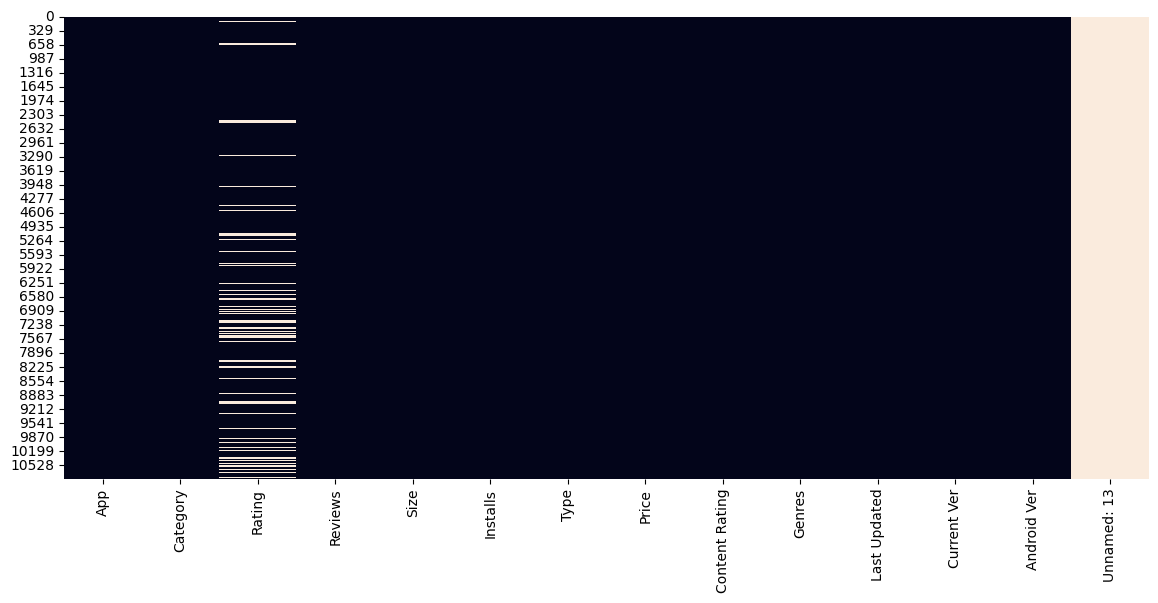

In [ ]:
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(), cbar=False)

Text(0.5, 1.0, 'Percentage of missing values in each column')

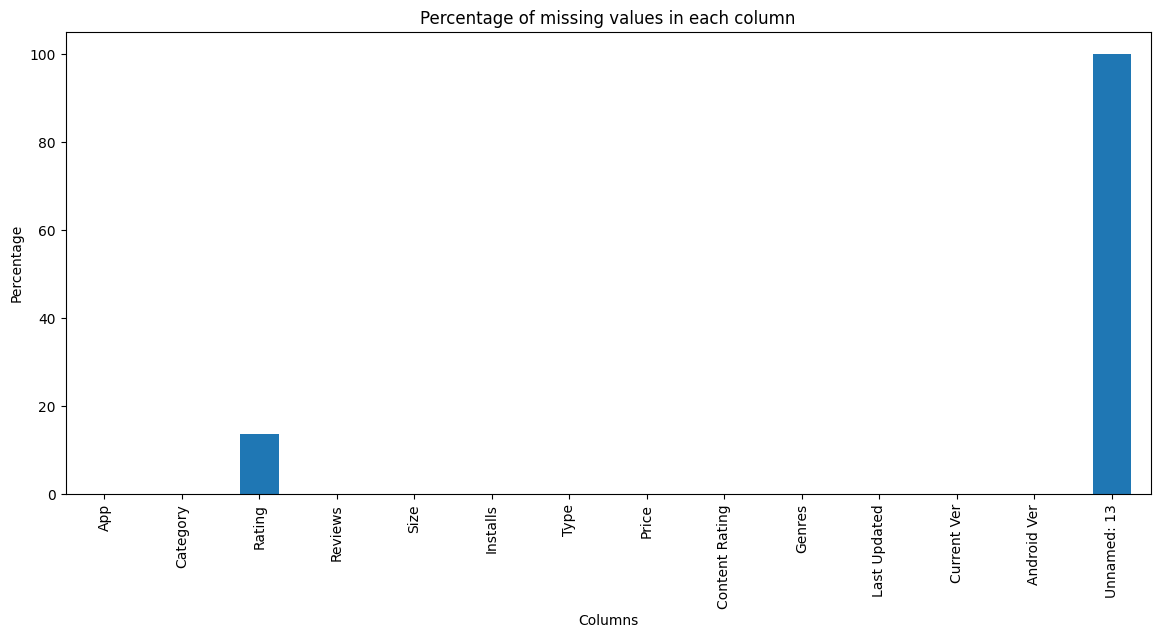

In [ ]:
plt.figure(figsize=(14,6))
missing_values = df.isnull().sum()/ len(df) *100
missing_values.plot(kind="bar")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.title("Percentage of missing values in each column")

<Axes: >

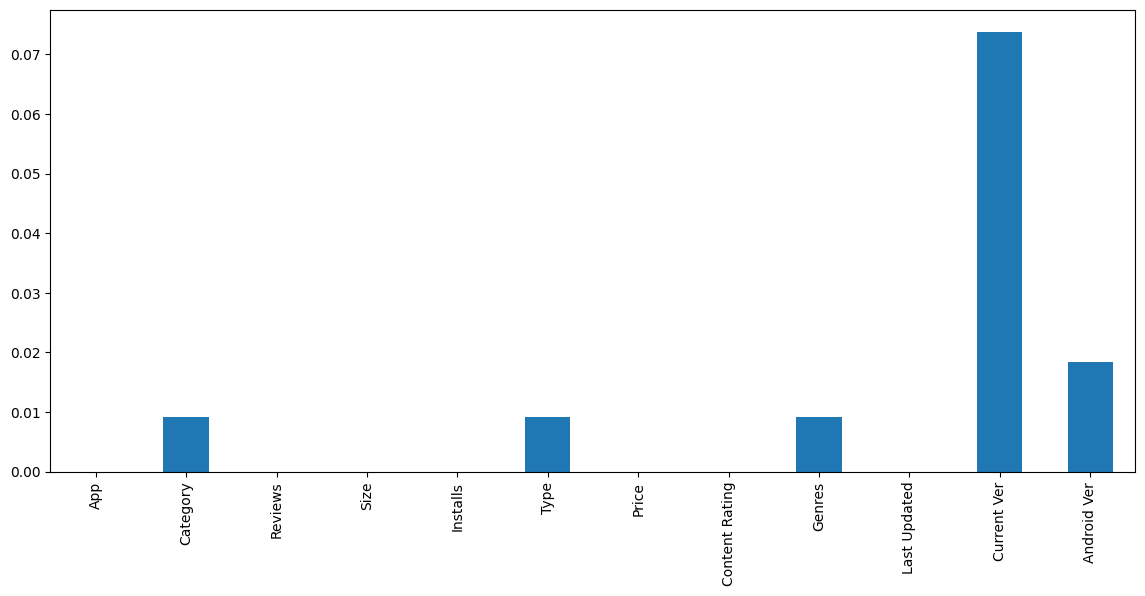

In [ ]:
plt.figure(figsize=(14,6))
missing_values[missing_values < 1].plot(kind="bar")

# **Working on anomalies in dataset**

# Drop the `Unnamed: 13` column from the dataset

In [ ]:
df.drop("Unnamed: 13", axis=1, inplace=True)
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# Feature Engineering the `Size`  column

In [ ]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
df["Size"].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: count, Length: 461, dtype: int64

In [ ]:
df["Size"].isnull().sum()

0

There is no `NaN` value in the `Size` column
*  Now, convert kbs and Mbs into bytes

In [ ]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
# Create a function for this purpose
def convert_size(size):
    if "M" in size:
        return float(size.replace("M", "")) * 1024 * 1024
    elif "k" in size:
        return float(size.replace("k", "")) * 1024
    elif "Varies with device" in size:
        return np.nan

In [ ]:
# let, apply this function to the 'Size' columns
df["Size"] = df["Size"].apply(convert_size)
df["Size"].value_counts()

Size
11534336.0    198
12582912.0    196
14680064.0    194
13631488.0    191
15728640.0    184
             ... 
440320.0        1
439296.0        1
204800.0        1
471040.0        1
633856.0        1
Name: count, Length: 459, dtype: int64

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.rename(columns= {"Size": "Size_in_bytes"}, inplace =True)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Now, add an other column as the name of `Size_in_Mbs` by using lambda function

In [ ]:
df["Size_in_Mbs"] = df["Size_in_bytes"].apply(lambda x : x / (1024*1024))
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mbs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


# Feature Engineering of `Installs` column 
* Remove `+` from the values 
* Rmove `,` from the values 

In [ ]:
df["Installs"].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [ ]:
df["Installs"] = df["Installs"].apply(lambda x : x.replace("+", "") if "+" in str(x) else x)
df["Installs"] = df["Installs"].apply(lambda x : x.replace(",", "") if "," in str(x) else x)
df["Installs"].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mbs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size_in_bytes   9146 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
 13  Size_in_Mbs     9146 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 1.2+ MB


In [ ]:
df["Installs"] = df["Installs"].apply(lambda x : int(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size_in_bytes   9146 non-null   float64
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
 13  Size_in_Mbs     9146 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 1.2+ MB


In [ ]:
print(f"This is the minimum value in the Installs column {df.Installs.min()}")
print(f"This is the maximum value in the Installs column {df.Installs.max()}")
print(f"This is the Average value in the Installs column {df.Installs.mean()}")

This is the minimum value in the Installs column 0
This is the maximum value in the Installs column 1000000000
This is the Average value in the Installs column 15462912.50687206


In [ ]:
df["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

In [ ]:
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels = ["no", "Very Low", "Low", "Moderate", "More than Moderate", "High","Very High", "Top Notch"]
df["Installs_category"] = pd.cut(df["Installs"], bins=bins, labels= labels)

In [ ]:
df["Installs_category"].value_counts()

Installs_category
Low                   2162
High                  2118
Very High             2004
More than Moderate    1648
Moderate              1531
Top Notch              828
Very Low               535
no                      15
Name: count, dtype: int64

# `Price` columns 
* Removing the `$` from the `Price` column   

In [ ]:
df['Price'].value_counts()

Price
0         10041
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: count, Length: 92, dtype: int64

In [ ]:
df["Price"].loc[df["Price"].str.contains("\$")].count()

800

In [ ]:
df['Price'].loc[(df["Price"].str.contains("0")) & (~df["Price"].str.contains("\$"))].count()

10041

In [ ]:
df["Price"] = df["Price"].apply(lambda x: x.replace("$", "") if x in str(x) else x)
df["Price"] = df["Price"].apply(lambda x: float(x))
df["Price"].dtype

dtype('float64')

In [ ]:
df["Price"].value_counts()

Price
0.00     10041
0.99       148
2.99       129
1.99        73
4.99        72
         ...  
19.90        1
1.75         1
14.00        1
4.85         1
1.04         1
Name: count, Length: 92, dtype: int64

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mbs,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,More than Moderate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   App                10841 non-null  object  
 1   Category           10840 non-null  object  
 2   Rating             9367 non-null   float64 
 3   Reviews            10841 non-null  int64   
 4   Size_in_bytes      9146 non-null   float64 
 5   Installs           10841 non-null  int64   
 6   Type               10840 non-null  object  
 7   Price              10841 non-null  float64 
 8   Content Rating     10841 non-null  object  
 9   Genres             10840 non-null  object  
 10  Last Updated       10841 non-null  object  
 11  Current Ver        10833 non-null  object  
 12  Android Ver        10839 non-null  object  
 13  Size_in_Mbs        9146 non-null   float64 
 14  Installs_category  10841 non-null  category
dtypes: category(1), float64(4), int64(2), object(8)
memor

In [ ]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mbs
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


Now, We have Convert all the numeric values into numeric datatype 

# Working on `Missing values`

In [ ]:
df.isnull().sum()

App                     0
Category                1
Rating               1474
Reviews                 0
Size_in_bytes        1695
Installs                0
Type                    1
Price                   0
Content Rating          0
Genres                  1
Last Updated            0
Current Ver             8
Android Ver             2
Size_in_Mbs          1695
Installs_category       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   App                10841 non-null  object  
 1   Category           10840 non-null  object  
 2   Rating             9367 non-null   float64 
 3   Reviews            10841 non-null  int64   
 4   Size_in_bytes      9146 non-null   float64 
 5   Installs           10841 non-null  int64   
 6   Type               10840 non-null  object  
 7   Price              10841 non-null  float64 
 8   Content Rating     10841 non-null  object  
 9   Genres             10840 non-null  object  
 10  Last Updated       10841 non-null  object  
 11  Current Ver        10833 non-null  object  
 12  Android Ver        10839 non-null  object  
 13  Size_in_Mbs        9146 non-null   float64 
 14  Installs_category  10841 non-null  category
dtypes: category(1), float64(4), int64(2), object(8)
memor

<Axes: >

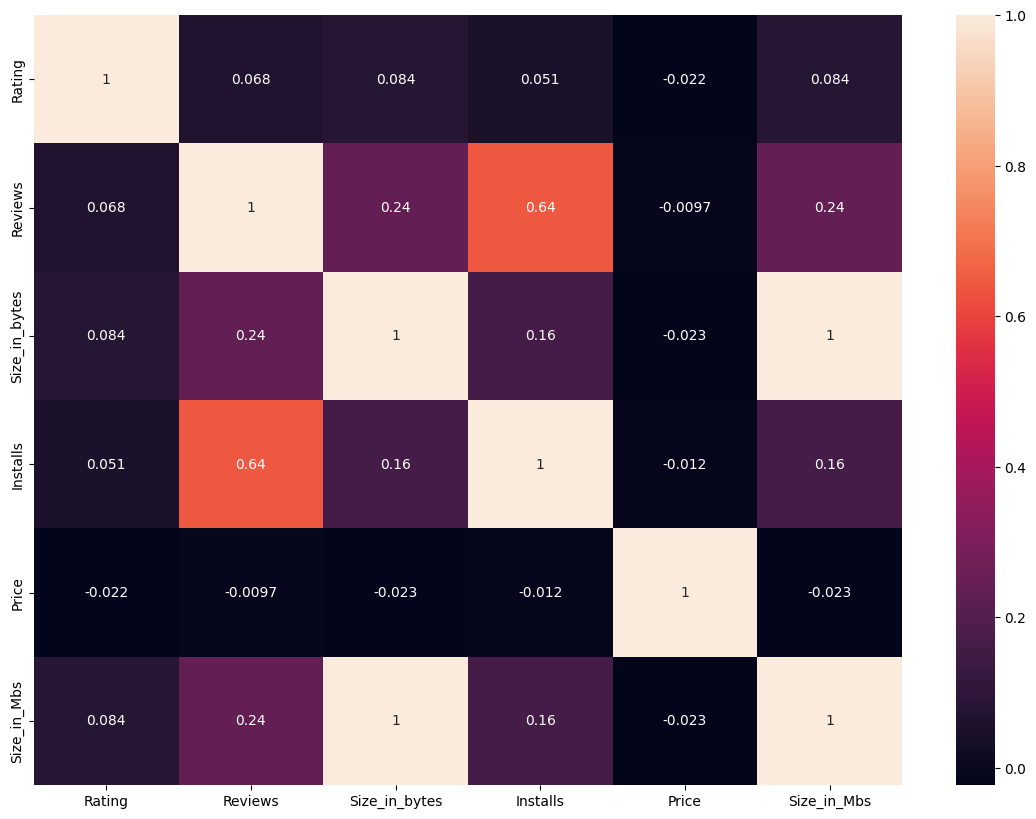

In [ ]:
plt.figure(figsize=(14,10))
numeric_cols = ["Rating", "Reviews","Size_in_bytes", "Installs", "Price", "Size_in_Mbs"]
sns.heatmap(df[numeric_cols].corr() , annot=True)

In [ ]:
df[numeric_cols].corr()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mbs
Rating,1.000000,0.068147,0.084098,0.051393,-0.021851,0.084098
Reviews,0.068147,1.000000,0.238218,0.643123,-0.009666,0.238218
Size_in_bytes,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000
Installs,0.051393,0.643123,0.164794,1.000000,-0.011688,0.164794
Price,-0.021851,-0.009666,-0.023000,-0.011688,1.000000,-0.023000
Size_in_Mbs,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000


# Correlation by using `Pearson's R` method

In [ ]:
from scipy import stats

df_clean = df.dropna()

pearson_r, p_value = stats.pearsonr(df_clean["Reviews"], df_clean["Installs"])
print(f"This is the Pearson's_R correlation between Reviews and Installs: {pearson_r:.4f}")

This is the Pearson's_R correlation between Reviews and Installs: 0.6262


In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mbs', 'Installs_category'],
      dtype='object')

In [ ]:
df.isnull().sum()

App                     0
Category                1
Rating               1474
Reviews                 0
Size_in_bytes        1695
Installs                0
Type                    1
Price                   0
Content Rating          0
Genres                  1
Last Updated            0
Current Ver             8
Android Ver             2
Size_in_Mbs          1695
Installs_category       0
dtype: int64

In [ ]:
print(f"The is the length of dataset before dropping null values: {len(df)}")

The is the length of dataset before dropping null values: 10841


In [ ]:
df.dropna(subset =["Category", "Type", "Genres", "Current Ver", "Android Ver"], inplace=True)

In [ ]:
print(f"This is the lenght of dataset after dropping null values: {len(df)}")

This is the lenght of dataset after dropping null values: 10829


*  We are remove `12` rows from the dataset which have NaN values in the columns of `Category`, `Type`, `Genres`, `Current Ver` and `Android Ver`

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1694
Size_in_Mbs          1694
Rating               1469
App                     0
Category                0
Reviews                 0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

# **Observation**
* There are three columns now which have missing or null values `Size_in_bytes = 1694`, `Size_in_Mbs = 1694` and `Rating = 1469`
    * we also know that we can't replace the `Rating` column null values with any other because `Rating` have correlation with `Installs`.
    * we also replace the "Varies with  device" with null values and no one predict this value also in both  `Size_in_bytes` and `Size_in_Mbs` columns null values are those "Varies with device" 

In [ ]:
df["Installs_category"].value_counts()

Installs_category
Low                   2158
High                  2116
Very High             2004
More than Moderate    1647
Moderate              1528
Top Notch              828
Very Low               534
no                      14
Name: count, dtype: int64

In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mbs', 'Installs_category'],
      dtype='object')

In [ ]:
df.groupby("Installs_category")["Rating"].describe()

C:\Users\dv04i\AppData\Local\Temp\ipykernel_6220\316663705.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Installs_category")["Rating"].describe()


,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very Low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More than Moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
Very High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


# We use the `pearson's_R` correlation for getting the correlation between `Rating` and `Installes`

In [ ]:
# with null values you can't calculate the pearson's_R correlation 
df_clear = df.dropna()
stats.pearsonr(df_clean["Rating"], df_clean["Installs"])

PearsonRResult(statistic=0.05269312825073974, pvalue=3.6010347974401046e-06)

In [ ]:
df["Installs_category"].loc[df["Rating"].isnull()].value_counts()

Installs_category
Low                   880
Very Low              453
Moderate               88
More than Moderate     31
no                     14
High                    3
Very High               0
Top Notch               0
Name: count, dtype: int64

Text(6, 3.5, 'Null values are 0')

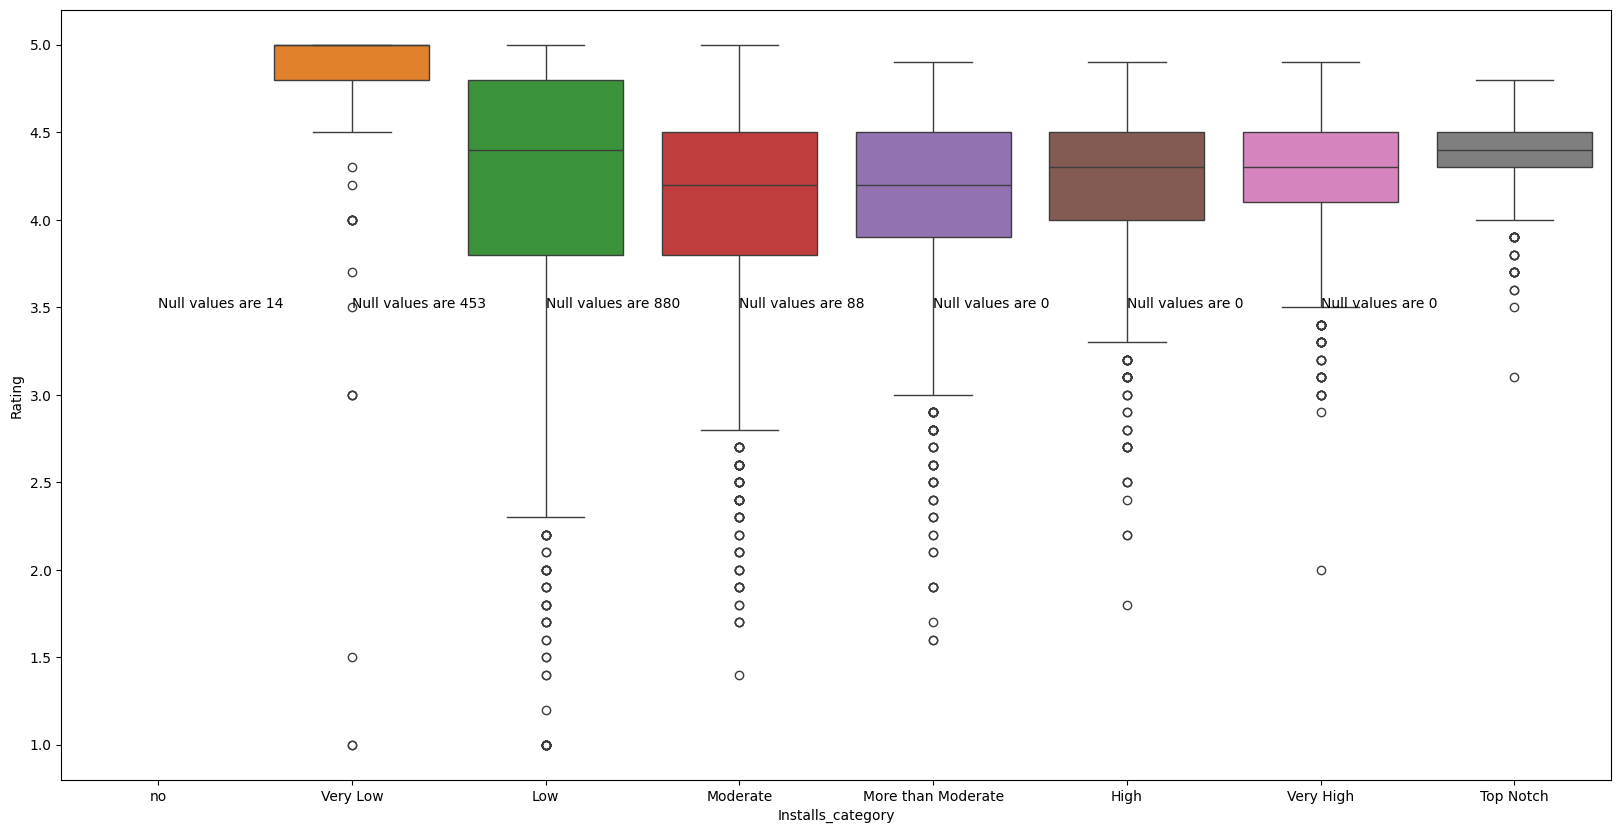

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Installs_category", y="Rating", data=df, hue="Installs_category")
plt.text(0,3.5,"Null values are 14")
plt.text(1,3.5,"Null values are 453")
plt.text(2,3.5,"Null values are 880")
plt.text(3,3.5,"Null values are 88")
plt.text(4,3.5,"Null values are 0")
plt.text(5,3.5,"Null values are 0")
plt.text(6,3.5,"Null values are 0")

In [ ]:
df["Installs_category"].loc[df["Reviews"].isnull()].value_counts()

Installs_category
no                    0
Very Low              0
Low                   0
Moderate              0
More than Moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

c:\Users\dv04i\miniconda3\envs\ydata_profiling\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Installs_category', ylabel='Reviews'>

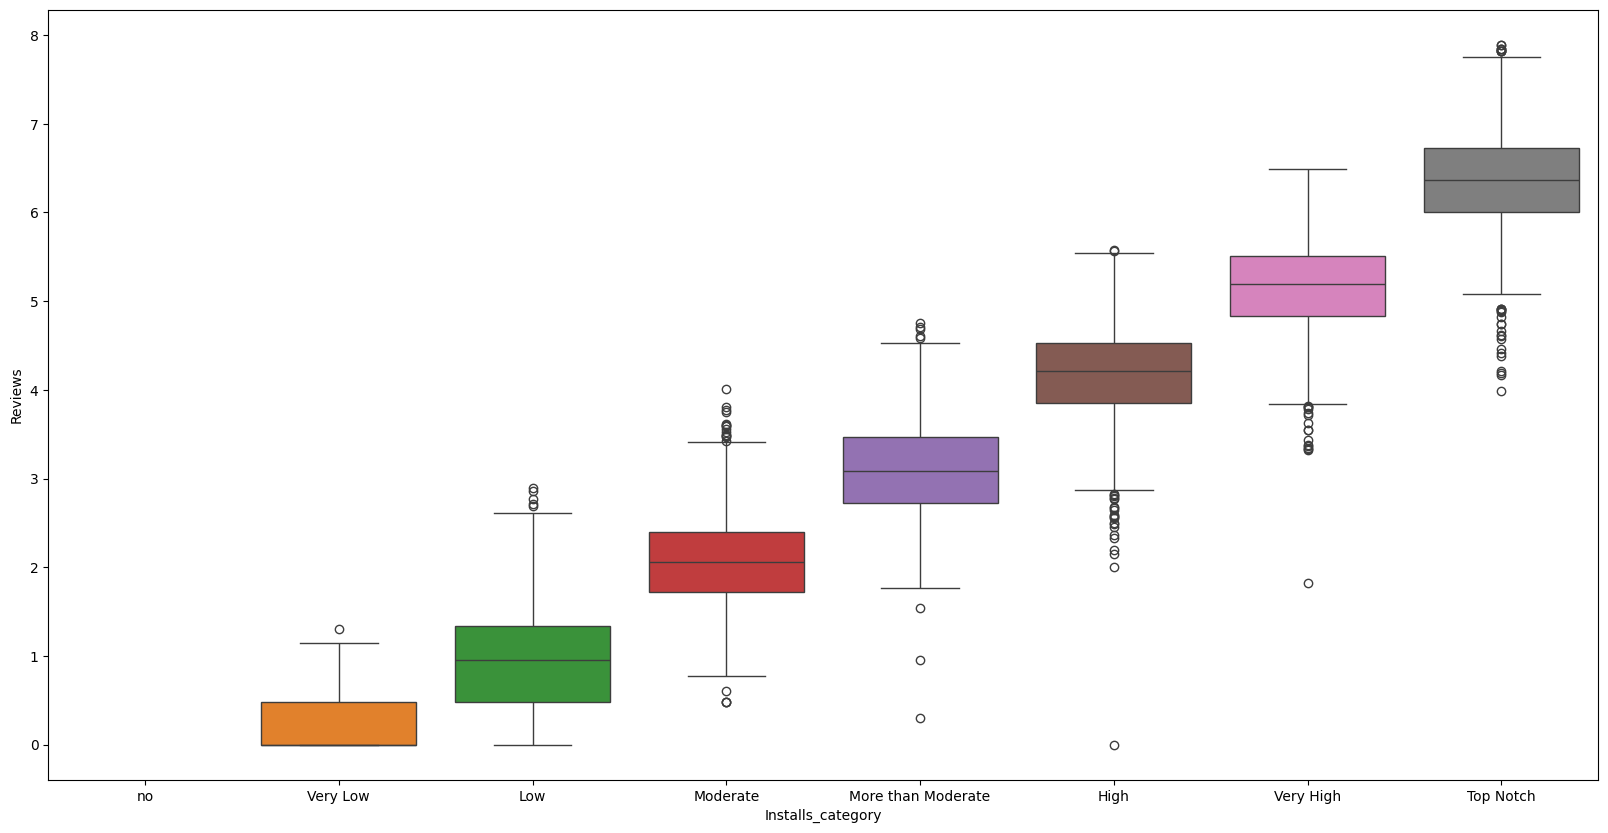

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Installs_category", y=np.log10(df["Reviews"]), data=df, hue="Installs_category")

<Axes: xlabel='Rating', ylabel='Reviews'>

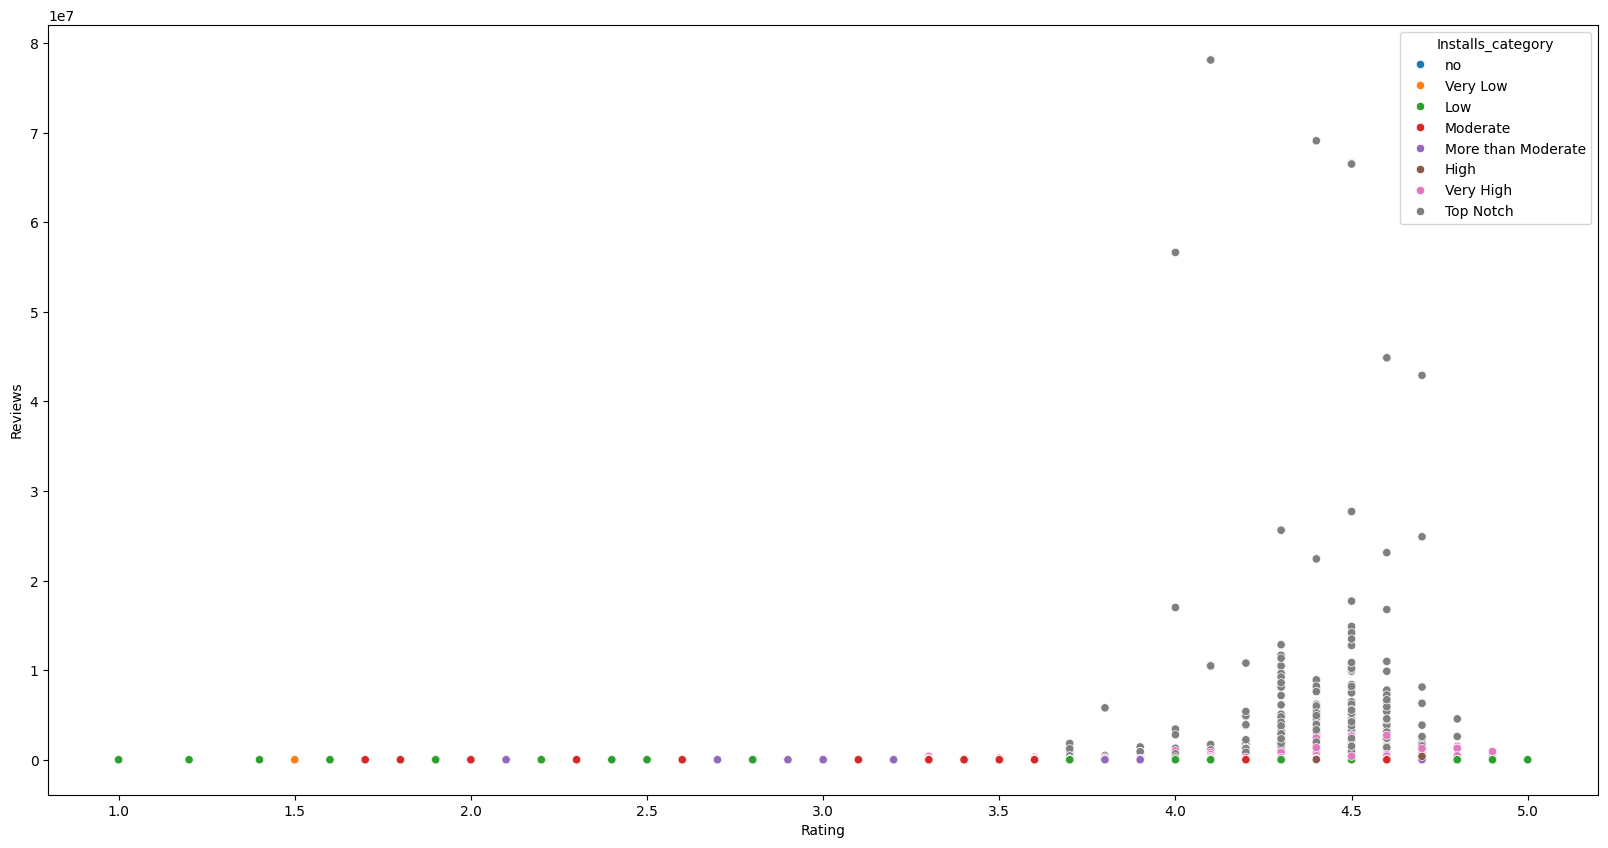

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="Rating", y="Reviews", data=df, hue="Installs_category")

<Axes: xlabel='Reviews', ylabel='Installs'>

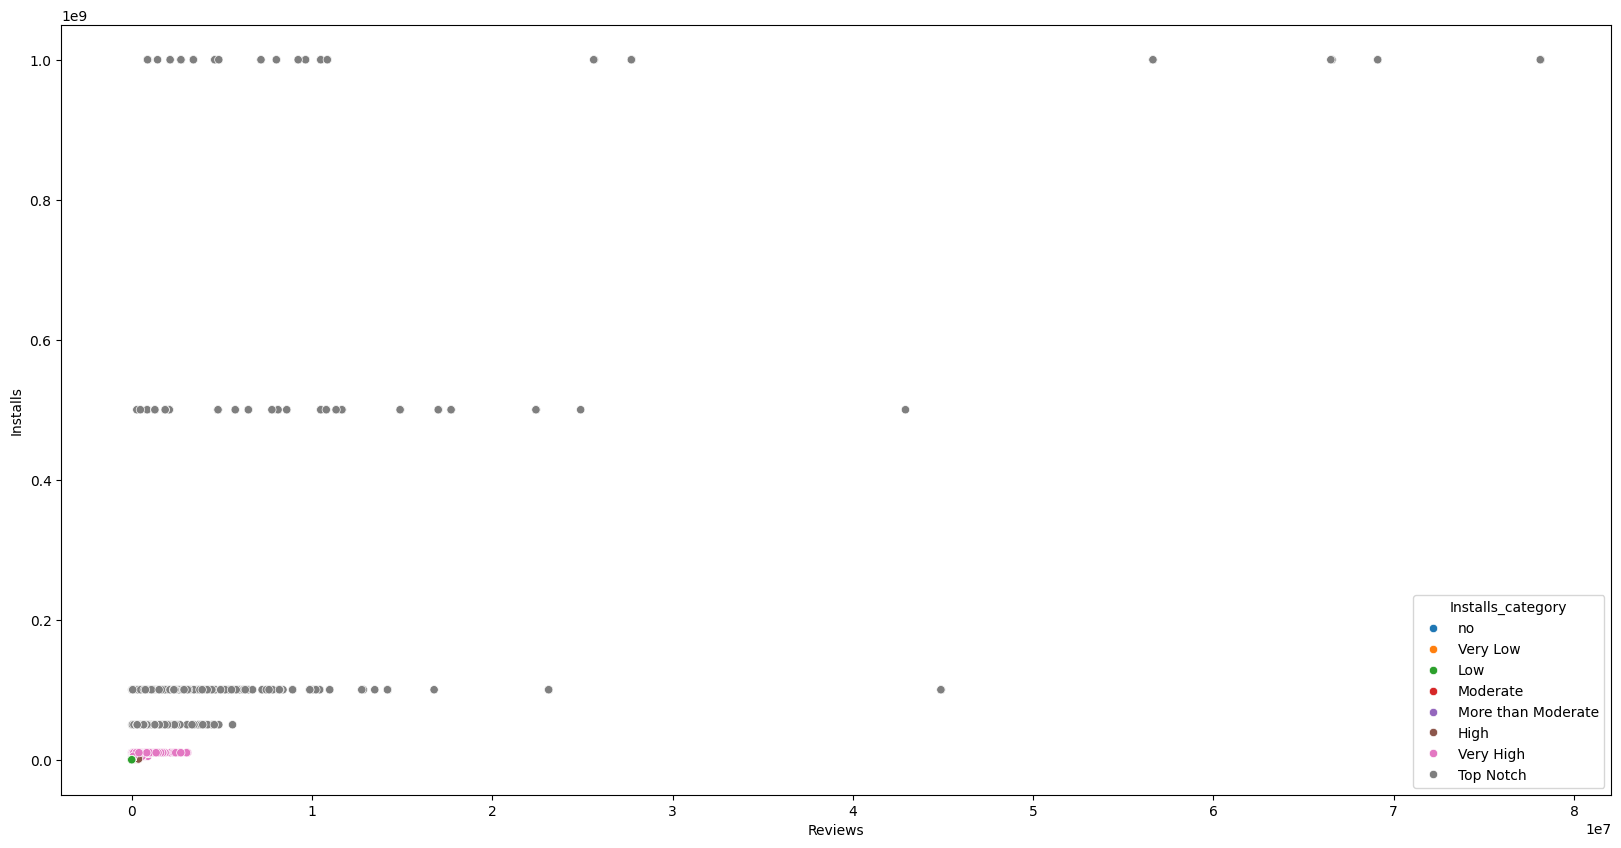

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x ="Reviews", y="Installs", data=df, hue="Installs_category")

c:\Users\dv04i\miniconda3\envs\ydata_profiling\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Reviews', ylabel='Installs'>

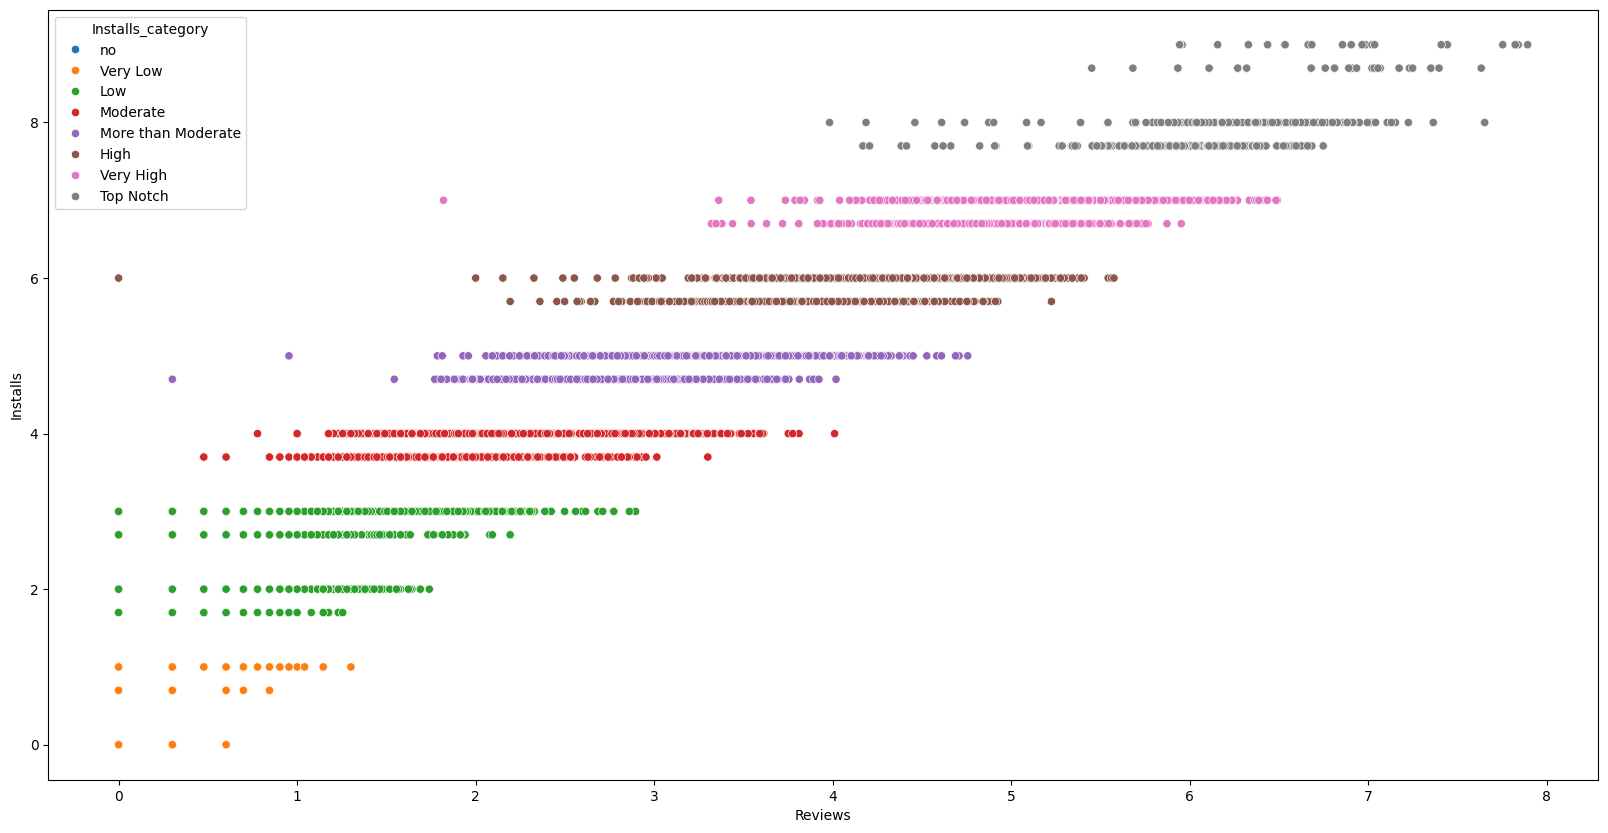

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x = np.log10(df["Reviews"]), y= np.log10(df["Installs"]), data=df, hue="Installs_category")

<Figure size 2000x1000 with 0 Axes>

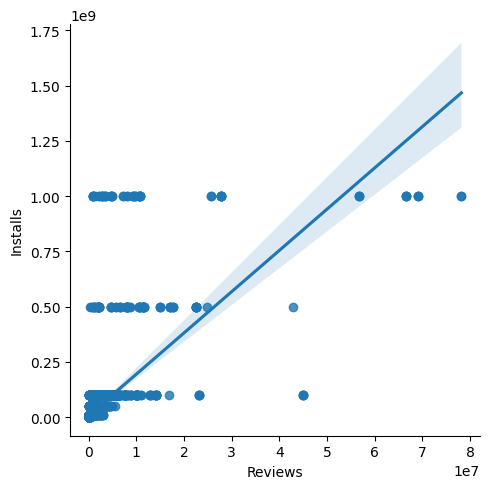

In [ ]:
plt.figure(figsize=(20, 10))
sns.lmplot(x="Reviews", y="Installs", data=df) 

----
# Observation:
* The values of Installs are depends on the `Rating` and `Reviews`, if the `Rating` and `Reviews` increace the  `Installs` will also increase.
* But, an other problem is that `App` column has duplicate values 


In [ ]:
df.duplicated().sum()

483

In [ ]:
df["App"].duplicated().sum()

1181

**Now, we check the number of duplicates in all the columns of the dataset**

In [ ]:
for col in df.columns:
    print(f"Numbers of duplicates in {col} column is {df[col].duplicated().sum()}")

Numbers of duplicates in App column is 1181
Numbers of duplicates in Category column is 10796
Numbers of duplicates in Rating column is 10789
Numbers of duplicates in Reviews column is 4830
Numbers of duplicates in Size_in_bytes column is 10373
Numbers of duplicates in Installs column is 10809
Numbers of duplicates in Type column is 10827
Numbers of duplicates in Price column is 10737
Numbers of duplicates in Content Rating column is 10823
Numbers of duplicates in Genres column is 10710
Numbers of duplicates in Last Updated column is 9453
Numbers of duplicates in Current Ver column is 7998
Numbers of duplicates in Android Ver column is 10796
Numbers of duplicates in Size_in_Mbs column is 10373
Numbers of duplicates in Installs_category column is 10821


Every column has duplicate values and it's not a small amount , So the best way to remove the duplicates is to use the duplicated values of the `whole dataset`.

In [ ]:
print(f"This is the Total Numbers of duplicates in the whole dataset:{df.duplicated().sum()}")

This is the Total Numbers of duplicates in the whole dataset:483


In [ ]:
df.duplicated().sum()

483

In [ ]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mbs,Installs_category
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up,NaN,Very High
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device,NaN,Very High
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up,NaN,Very High
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,38797312.0,10000000,Free,0.0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up,37.0,Very High
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up,NaN,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,NaN,10000000,Free,0.0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device,NaN,Very High
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,NaN,1000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device,NaN,High
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,NaN,100000000,Free,0.0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device,NaN,Top Notch
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,90177536.0,10000,Free,0.0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up,86.0,Moderate


In [ ]:
df[df["App"].duplicated(keep=False)].sort_values("App")

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mbs,Installs_category
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.8,High
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.8,High
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.0,High
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.0,High
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3984588.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,3.8,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,NaN,50000000,Free,0.00,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device,NaN,Top Notch
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,NaN,50000000,Free,0.00,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device,NaN,Top Notch
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,NaN,50000000,Free,0.00,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device,NaN,Top Notch
8291,wetter.com - Weather and Radar,WEATHER,4.2,189310,39845888.0,10000000,Free,0.00,Everyone,Weather,"August 6, 2018",Varies with device,Varies with device,38.0,Very High


Now, we know that these all are real duplicated values
### So, we remove the duplicate values

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print(f"Now the total number of row after removing the duplicate values is: {df.shape[0]}")

Now the total number of row after removing the duplicate values is: 10346


We remove the 483 duplicate rows from the dataset. 

----
# **Important Questions about the dataset**

### 1. What are the total number of apps according to the Top 10 `categories`?

In [ ]:
df["Category"].value_counts().head(10)

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

### 2. What are the total numbers of categories in our dataset?

In [ ]:
df["Category"].nunique()
df["Category"].value_counts().count() # This is another way to get the total count of unique values

33

### 3. Which category has the highest number of installs?

In [ ]:
df.groupby("Category")["Installs"].sum().sort_values(ascending=False).head(5)

Category
GAME             31544024415
COMMUNICATION    24152276251
SOCIAL           12513867902
PRODUCTIVITY     12463091369
TOOLS            11452271905
Name: Installs, dtype: int64

### 4. Which category has the highest number of reviews?

In [ ]:
df.groupby("Category")["Reviews"].sum().sort_values(ascending =True).head(5)

Category
EVENTS                 161018
BEAUTY                 396240
PARENTING              958331
LIBRARIES_AND_DEMO    1016973
AUTO_AND_VEHICLES     1163666
Name: Reviews, dtype: int64

### 5. Which category has the highest rating?

In [ ]:
df.groupby("Category")["Rating"].sum().sort_values(ascending=False).head(5)     

Category
FAMILY             7196.4
GAME               4598.1
TOOLS              2966.6
PRODUCTIVITY       1403.4
PERSONALIZATION    1334.6
Name: Rating, dtype: float64

In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mbs', 'Installs_category'],
      dtype='object')

-----
# **Creating Questions about our dataset**

### 1. Which category has more number of apps?

In [ ]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

these are the number of apps with their category

In [ ]:
df["Category"].value_counts().head(10)

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

### 2. Which app has more `Rating`?

In [ ]:
df.groupby("Category")["Rating"].max().sort_values(ascending=False)


Category
ART_AND_DESIGN         5.0
GAME                   5.0
SPORTS                 5.0
SOCIAL                 5.0
SHOPPING               5.0
PRODUCTIVITY           5.0
PHOTOGRAPHY            5.0
PERSONALIZATION        5.0
PARENTING              5.0
NEWS_AND_MAGAZINES     5.0
MEDICAL                5.0
LIFESTYLE              5.0
LIBRARIES_AND_DEMO     5.0
TRAVEL_AND_LOCAL       5.0
HEALTH_AND_FITNESS     5.0
FOOD_AND_DRINK         5.0
FINANCE                5.0
FAMILY                 5.0
EVENTS                 5.0
DATING                 5.0
COMMUNICATION          5.0
COMICS                 5.0
BUSINESS               5.0
BOOKS_AND_REFERENCE    5.0
TOOLS                  5.0
AUTO_AND_VEHICLES      4.9
MAPS_AND_NAVIGATION    4.9
VIDEO_PLAYERS          4.9
EDUCATION              4.9
BEAUTY                 4.9
HOUSE_AND_HOME         4.8
WEATHER                4.8
ENTERTAINMENT          4.7
Name: Rating, dtype: float64

### 3. Which apps having 5 out of 5 rating on the playstore?

In [ ]:
df[df["Rating"]== 5.0]

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mbs,Installs_category
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,38797312.0,1000,Free,0.0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up,37.0,Low
612,American Girls Mobile Numbers,DATING,5.0,5,4613734.4,1000,Free,0.0,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up,4.4,Low
615,Awake Dating,DATING,5.0,2,73400320.0,100,Free,0.0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up,70.0,Low
633,Spine- The dating app,DATING,5.0,5,9751756.8,500,Free,0.0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up,9.3,Low
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5242880.0,100,Free,0.0,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up,5.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,Mad Dash Fo' Cash,GAME,5.0,14,16777216.0,100,Free,0.0,Everyone,Arcade,"June 19, 2017",2.5a,4.1 and up,16.0,Low
10742,GKPB FP Online Church,LIFESTYLE,5.0,32,8283750.4,1000,Free,0.0,Everyone,Lifestyle,"December 31, 2017",0.7.1,4.4 and up,7.9,Low
10776,Monster Ride Pro,GAME,5.0,1,25165824.0,10,Free,0.0,Everyone,Racing,"March 5, 2018",2.0,2.3 and up,24.0,Very Low
10820,Fr. Daoud Lamei,FAMILY,5.0,22,9017753.6,1000,Free,0.0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up,8.6,Low


`271` apps having `Rating` on 5 out of 5

### 4. Which `Category` have more app `Size_in_Mbs`

In [ ]:
df["Size_in_Mbs"].max()

100.0

In [ ]:
df.groupby("Category")["Size_in_Mbs"].max().sort_values(ascending=False)

Category
HEALTH_AND_FITNESS     100.0
FAMILY                 100.0
SPORTS                 100.0
MEDICAL                100.0
LIFESTYLE              100.0
GAME                   100.0
FINANCE                100.0
LIBRARIES_AND_DEMO      99.0
TOOLS                   99.0
PARENTING               98.0
SHOPPING                98.0
BUSINESS                98.0
EDUCATION               97.0
AUTO_AND_VEHICLES       97.0
SOCIAL                  96.0
PHOTOGRAPHY             96.0
VIDEO_PLAYERS           91.0
PERSONALIZATION         91.0
TRAVEL_AND_LOCAL        90.0
BOOKS_AND_REFERENCE     87.0
ENTERTAINMENT           78.0
MAPS_AND_NAVIGATION     78.0
DATING                  77.0
HOUSE_AND_HOME          77.0
PRODUCTIVITY            76.0
FOOD_AND_DRINK          76.0
COMMUNICATION           66.0
NEWS_AND_MAGAZINES      62.0
EVENTS                  61.0
BEAUTY                  57.0
WEATHER                 54.0
COMICS                  40.0
ART_AND_DESIGN          39.0
Name: Size_in_Mbs, dtype: float64

### 5. Which app `Size` has more download or `Installs`?

In [ ]:
df["Size_in_Mbs"].unique()

array([1.90000000e+01, 1.40000000e+01, 8.70000000e+00, 2.50000000e+01,
       2.80000000e+00, 5.60000000e+00, 2.90000000e+01, 3.30000000e+01,
       3.10000000e+00, 2.80000000e+01, 1.20000000e+01, 2.00000000e+01,
       2.10000000e+01, 3.70000000e+01, 5.50000000e+00, 1.70000000e+01,
       3.90000000e+01, 3.10000000e+01, 4.20000000e+00, 7.00000000e+00,
       2.30000000e+01, 6.00000000e+00, 6.10000000e+00, 4.60000000e+00,
       9.20000000e+00, 5.20000000e+00, 1.10000000e+01, 2.40000000e+01,
                  nan, 9.40000000e+00, 1.50000000e+01, 1.00000000e+01,
       1.20000000e+00, 2.60000000e+01, 8.00000000e+00, 7.90000000e+00,
       5.60000000e+01, 5.70000000e+01, 3.50000000e+01, 5.40000000e+01,
       1.96289062e-01, 3.60000000e+00, 5.70000000e+00, 8.60000000e+00,
       2.40000000e+00, 2.70000000e+01, 2.70000000e+00, 2.50000000e+00,
       1.60000000e+01, 3.40000000e+00, 8.90000000e+00, 3.90000000e+00,
       2.90000000e+00, 3.80000000e+01, 3.20000000e+01, 5.40000000e+00,
      

### 6. Which `Category` has more `Size_in_Mbs`?

In [ ]:
df.groupby("Installs_category")["Size_in_Mbs"].sum().sort_values(ascending=False)

C:\Users\dv04i\AppData\Local\Temp\ipykernel_6220\3586714295.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Installs_category")["Size_in_Mbs"].sum().sort_values(ascending=False)


Installs_category
High                  43596.559180
Very High             40380.632031
Low                   28873.358203
More than Moderate    28643.456543
Moderate              21691.926563
Top Notch             17379.200000
Very Low               7194.811328
no                      182.400000
Name: Size_in_Mbs, dtype: float64

In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mbs', 'Installs_category'],
      dtype='object')

### 7. Which `Type` has more  number of installs?

In [ ]:
df["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
df.groupby("Type")["Installs"].sum()

Type
Free    146561162546
Paid        69174871
Name: Installs, dtype: int64

### 8. Which `Contant Rating` have more number of installs ?

In [ ]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
df.groupby("Content Rating")["Installs"].sum().sort_values(ascending=False)

Content Rating
Everyone           100228037851
Teen                30918280393
Everyone 10+        11191271795
Mature 17+           4290696878
Adults only 18+         2000000
Unrated                   50500
Name: Installs, dtype: int64

### 9. What is Minimum `Current ver` of the `Top Notch` apps?

In [ ]:
df.groupby("Installs_category")["Current Ver"].min().sort_values(ascending=False)

C:\Users\dv04i\AppData\Local\Temp\ipykernel_6220\903129919.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Installs_category")["Current Ver"].min().sort_values(ascending=False)


Installs_category
Top Notch                   0.111.3
Very High             0.1.100944346
High                         0.0.73
More than Moderate            0.0.2
no                            0.0.1
Very Low                      0.0.1
Low                           0.0.1
Moderate                    0.0.0.2
Name: Current Ver, dtype: object

### 10. What is Maximum `Current ver` of the `Top Notch` apps?

In [ ]:
df.groupby("Installs_category")["Current Ver"].max().sort_values(ascending=False)

C:\Users\dv04i\AppData\Local\Temp\ipykernel_6220\2480274690.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Installs_category")["Current Ver"].max().sort_values(ascending=False)


Installs_category
Low                            version 0.994
Moderate                          v8[1.0.10]
Very High                    v8.0.1.8.0629.1
More than Moderate    v67_slk3.0_20180115_01
High                                  v5.4.3
Very Low                                  v3
Top Notch                 Varies with device
no                                     MONEY
Name: Current Ver, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10346 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   App                10346 non-null  object  
 1   Category           10346 non-null  object  
 2   Rating             8886 non-null   float64 
 3   Reviews            10346 non-null  int64   
 4   Size_in_bytes      8821 non-null   float64 
 5   Installs           10346 non-null  int64   
 6   Type               10346 non-null  object  
 7   Price              10346 non-null  float64 
 8   Content Rating     10346 non-null  object  
 9   Genres             10346 non-null  object  
 10  Last Updated       10346 non-null  object  
 11  Current Ver        10346 non-null  object  
 12  Android Ver        10346 non-null  object  
 13  Size_in_Mbs        8821 non-null   float64 
 14  Installs_category  10346 non-null  category
dtypes: category(1), float64(4), int64(2), object(8)
memory usa

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1525
Size_in_Mbs          1525
Rating               1460
App                     0
Category                0
Reviews                 0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

In [ ]:
# save the cleaned dataset in local machine 
df.to_csv("Datasets/google_playstore_cleaned.csv")

In [216]:
import pandas_profiling as ydata
profile = ydata.ProfileReport(df)
profile.to_file("output/google_playstore_cleaned.html")

c:\Users\dv04i\miniconda3\envs\ydata_profiling\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\dv04i\AppData\Local\Temp\ipykernel_6220\2975633985.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as ydata
Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: 'output\\google_playstore_cleaned.html'